In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils.linear_approximator import linapx
%load_ext autoreload
%autoreload 2

# Task 2


## Part One

#### Load data

In [2]:
x0 = np.loadtxt("data/linear_vectorfield_data_x0.txt")
x1 = np.loadtxt("data/linear_vectorfield_data_x1.txt")
N, _ = x0.shape
dx = x1-x0

#### Note that no need to search for a best dt, as the vector field is a linear system! The following codes evidence of this.

In [3]:
dt = 0.0
while dt<0.1:
    dt += 0.001
    vx = dx/dt
    task2 = linapx(x=x0, fx=vx)
    vhat = task2.predict()
    x1_hat = x0 + vhat*dt
    MSE = np.square(x1 - x1_hat).mean()
    print("[dt=%.4f] Mean Squared Error:"%dt, MSE)

[dt=0.0010] Mean Squared Error: 5.266092665837768e-17
[dt=0.0020] Mean Squared Error: 5.266092665837768e-17
[dt=0.0030] Mean Squared Error: 5.266092664872647e-17
[dt=0.0040] Mean Squared Error: 5.266092665837768e-17
[dt=0.0050] Mean Squared Error: 5.266092663762194e-17
[dt=0.0060] Mean Squared Error: 5.266092664872647e-17
[dt=0.0070] Mean Squared Error: 5.2660926641071534e-17
[dt=0.0080] Mean Squared Error: 5.266092665837768e-17
[dt=0.0090] Mean Squared Error: 5.266092663536779e-17
[dt=0.0100] Mean Squared Error: 5.266092663693673e-17
[dt=0.0110] Mean Squared Error: 5.2660926640629944e-17
[dt=0.0120] Mean Squared Error: 5.266092663524466e-17
[dt=0.0130] Mean Squared Error: 5.2660926644457115e-17
[dt=0.0140] Mean Squared Error: 5.2660926644629185e-17
[dt=0.0150] Mean Squared Error: 5.26609266592739e-17
[dt=0.0160] Mean Squared Error: 5.266092665301802e-17
[dt=0.0170] Mean Squared Error: 5.2660926638976036e-17
[dt=0.0180] Mean Squared Error: 5.26609266461767e-17
[dt=0.0190] Mean Squared 

In [4]:
dt = 0.1
vx = dx/dt

#### Approximate v(x) via linear regression

In [5]:
task2 = linapx(x=x0, fx=vx)

In [6]:
task2.coefficient #nxd

array([[-0.49355245, -0.4638232 ],
       [ 0.23191153, -0.95737573]])

## Part Two

In [7]:
vhat = task2.predict()
x1_hat = x0 + vhat*dt
MSE = np.square(x1 - x1_hat).mean()
print("Mean Squared Error:", MSE)

Mean Squared Error: 5.266092663607913e-17


## Part Three

#### Euler's Algorithm: simulate the trajectory starts from (10, 10) at t=0 to t=100s, with timestep=0.1s 

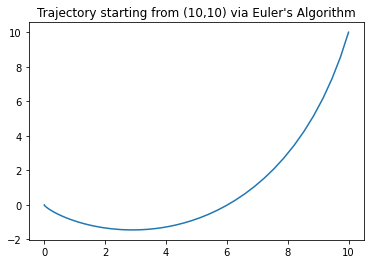

In [8]:
xt = [np.array([10, 10])]
dt = 0.1
T_end = 100
t = 0

while t<T_end:
    t += dt
    xt.append(task2.predict(X=xt[-1])*dt + xt[-1])

xt = np.array(xt).reshape((-1, 2))

plt.plot(xt[:, 0], xt[:, 1])
plt.title("Trajectory starting from (10,10) via Euler's Algorithm")
plt.show()

#### Make grid

In [9]:
w = 10
num = 100j
Y, X = np.mgrid[-w:w:num, -w:w:num]
x = X.reshape(-1, 1)
y = Y.reshape(-1, 1)
xy = np.column_stack((x, y))

In [10]:
xy

array([[-10.       , -10.       ],
       [ -9.7979798, -10.       ],
       [ -9.5959596, -10.       ],
       ...,
       [  9.5959596,  10.       ],
       [  9.7979798,  10.       ],
       [ 10.       ,  10.       ]])

#### Vector field as a linear system:

In [11]:
Vxy = task2.predict(xy)

#### Plot the vector field

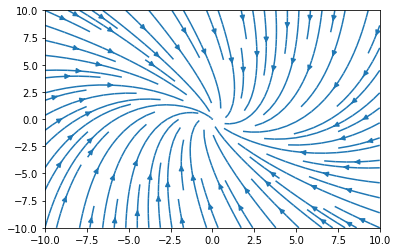

In [12]:
iNum = int(num.imag)
U = Vxy[:,0].reshape(iNum, iNum)
V = Vxy[:,1].reshape(iNum, iNum)
plt.streamplot(X, Y, U, V)
plt.show()

#### Verify the trajectory in part two

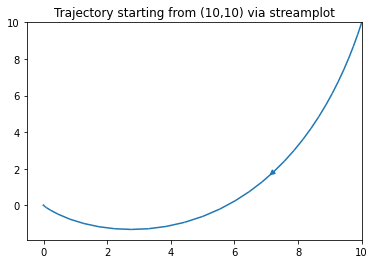

In [13]:
plt.streamplot(X, Y, U, V, start_points=[(10,10)])
plt.title("Trajectory starting from (10,10) via streamplot")
plt.show()